In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_data_cleaned.csv')

In [3]:
df.head()

,Job Name,Company,Rating,Location,Salary,Description,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,avg_salary,job_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist I,VirginPulse,3.4,Remote,Employer Provided Salary:$95K,Overview:\nJoin Virgin Pulse Today!\n\nVirgin ...,-1,501 to 1000 Employees,2004,Company - Private,...,95.0,0.0,95.0,Remote,19,0,0,0,0,0
1,Junior Data Scientist,Choice Fitness,3.3,"Atlanta, GA",$71K - $102K (Glassdoor est.),"As a Junior Data Scientist, you will help supp...",-1,Unknown,-1,Company - Public,...,71.0,102.0,86.5,GA,-1,1,0,0,1,1
2,Data Scientist (REMOTE),"General Dynamics Mission Systems, Inc",3.8,Remote,Employer Provided Salary:$120K - $133K,Basic Qualifications :\nRequires a Bachelor’s ...,-1,10000+ Employees,1952,Subsidiary or Business Segment,...,120.0,133.0,126.5,Remote,71,0,0,0,0,1
3,Data Scientist Co-Op - Masters Degree - Fall 2023,Torc Robotics,4.3,"Austin, TX",Employer Provided Salary:$31.00 - $37.00 Per Hour,"About the Company\nAt Torc, we have always bel...",-1,501 to 1000 Employees,2007,Company - Private,...,31.0,37.0,34.0,TX,16,0,0,0,0,0
4,Junior Data Scientist,Club Quarters,3.2,"Stamford, CT",Employer Provided Salary:$80K - $100K,Club Quarters Application- US\n\nJunior Data S...,-1,501 to 1000 Employees,-1,Company - Private,...,80.0,100.0,90.0,CT,-1,0,0,0,0,0


In [4]:
df.columns

Index(['Job Name', 'Company', 'Rating', 'Location', 'Salary', 'Description',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'AI' in title:
        return 'artificial intelligence'
    elif 'artificial intelligence' in title.lower():
        return 'artificial intelligence'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'head' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'associate' in title.lower():
        return 'jr'
    elif 'co-op' in title.lower():
        return 'co-op'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Name'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist             1060
data engineer               119
analyst                     103
na                           59
manager                      21
mle                          12
director                     11
artificial intelligence       2
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Name'].apply(seniority)
df.seniority.value_counts()

na        913
senior    287
jr        167
co-op      20
Name: seniority, dtype: int64

In [9]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'massachusetts' else 'MA')
df.job_state.value_counts()

CA        305
MA        124
VA        112
Remote     99
IL         89
NY         73
TX         71
MI         50
GA         50
MD         37
WA         36
PA         34
WI         33
MO         30
MN         24
FL         23
NC         23
NJ         22
DC         15
TN         15
OH         14
CO         11
IA         10
AZ         10
UT         10
IN         10
AL          8
CT          7
DE          6
KY          6
KS          5
NE          4
LA          4
OR          4
NM          3
MS          3
ID          2
VT          1
MT          1
AR          1
RI          1
SC          1
Name: job_state, dtype: int64

In [10]:
#  Job description length 
df['desc_len'] = df['Description'].apply(lambda x: len(x))
df['desc_len']

0        867
1       2209
2       1001
3        607
4        682
        ... 
1382    6162
1383    6130
1384    3078
1385    1642
1386    3673
Name: desc_len, Length: 1387, dtype: int64

In [11]:
df['min_salary'] = df.apply(lambda x:x.min_salary*2 if x.hourly==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x:x.max_salary*2 if x.hourly==1 else x.max_salary, axis=1)

In [12]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
3,1,62.00,74.00
11,1,140.00,160.00
18,1,30.00,40.00
22,1,130.00,0.00
29,1,48.36,84.62
...,...,...,...
1290,1,54.00,94.00
1311,1,36.00,50.00
1327,1,48.00,78.00
1356,1,42.00,68.00


In [13]:
df['avg_salary'] = df.apply(lambda row:(row['min_salary']+row['max_salary'])/2 if row['max_salary']>0 else row['min_salary'], axis=1)

In [14]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len
count,1387.000000,1387.0,1387.000000,1387.0,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,3.600000,-1.0,1657.075703,-1.0,0.049027,0.243691,82.221774,125.876136,105.155299,43.230714,0.385725,0.001442,0.120404,0.146359,0.363374,2551.113915
std,1.096735,0.0,721.766715,0.0,0.216002,0.429463,30.411135,46.685678,35.240490,51.669921,0.486942,0.037959,0.325550,0.353593,0.481145,1847.375041
min,-1.000000,-1.0,-1.000000,-1.0,0.000000,0.000000,15.000000,0.000000,15.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.000000
25%,3.400000,-1.0,1876.500000,-1.0,0.000000,0.000000,61.000000,98.000000,81.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1003.000000
50%,3.800000,-1.0,1978.000000,-1.0,0.000000,0.000000,81.000000,126.000000,103.500000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2209.000000
75%,4.100000,-1.0,2004.500000,-1.0,0.000000,0.000000,97.500000,149.000000,124.500000,58.500000,1.000000,0.000000,0.000000,0.000000,1.000000,3839.500000
max,5.000000,-1.0,2019.000000,-1.0,1.000000,1.000000,202.000000,306.000000,254.000000,322.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000


In [15]:
df.columns

Index(['Job Name', 'Company', 'Rating', 'Location', 'Salary', 'Description',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

<Axes: >

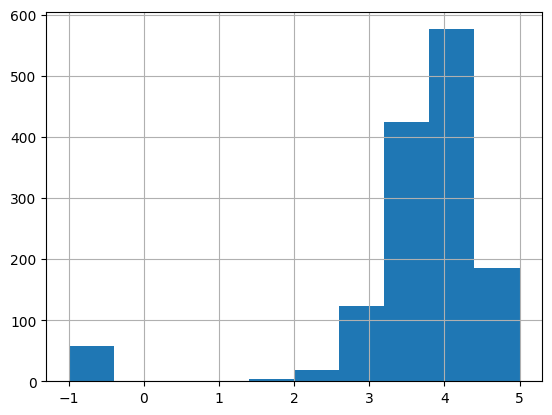

In [16]:
df.Rating.hist()

<Axes: >

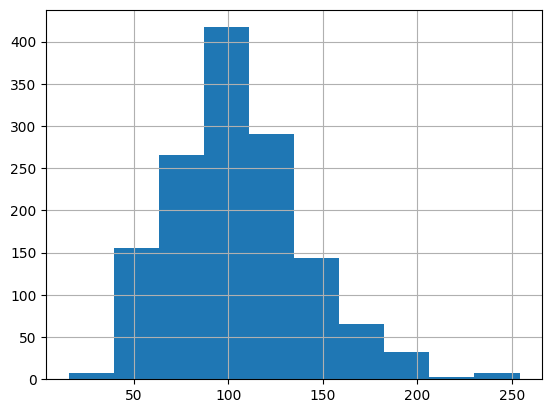

In [17]:
df.avg_salary.hist()

<Axes: >

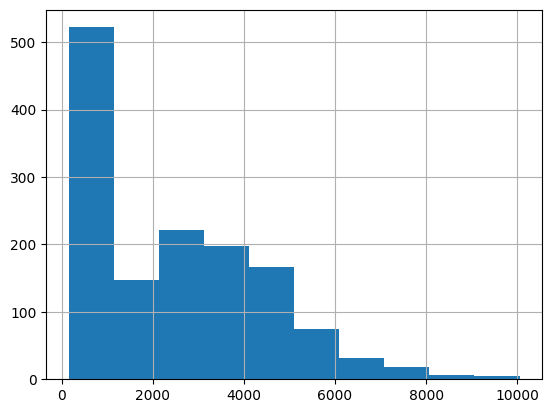

In [18]:
df.desc_len.hist()

<Axes: >

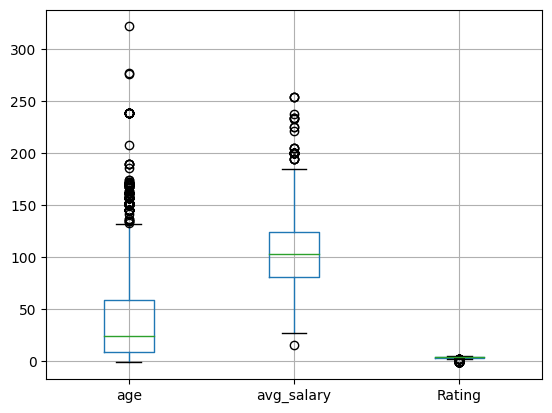

In [19]:
df.boxplot(column=['age','avg_salary','Rating'])

<Axes: >

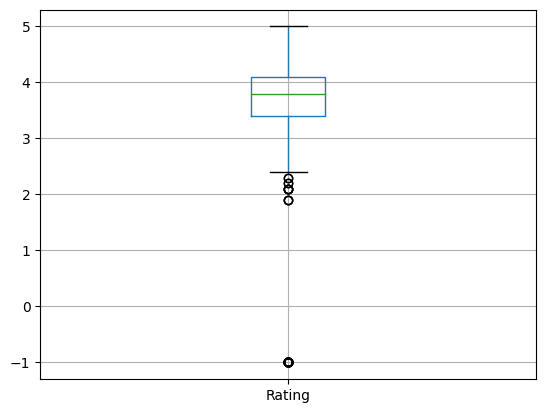

In [20]:
df.boxplot(column='Rating')

In [21]:
corr = df[['age','avg_salary','Rating','desc_len']].corr()

<Axes: >

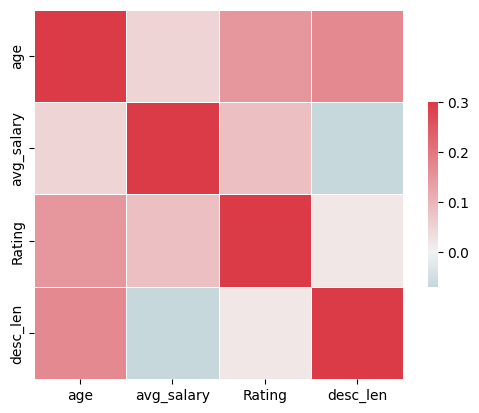

In [22]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
df.columns

Index(['Job Name', 'Company', 'Rating', 'Location', 'Salary', 'Description',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [24]:
df.head()

,Job Name,Company,Rating,Location,Salary,Description,Headquarters,Size,Founded,Type of ownership,...,job_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len
0,Data Scientist I,VirginPulse,3.4,Remote,Employer Provided Salary:$95K,Overview:\nJoin Virgin Pulse Today!\n\nVirgin ...,-1,501 to 1000 Employees,2004,Company - Private,...,Remote,19,0,0,0,0,0,data scientist,na,867
1,Junior Data Scientist,Choice Fitness,3.3,"Atlanta, GA",$71K - $102K (Glassdoor est.),"As a Junior Data Scientist, you will help supp...",-1,Unknown,-1,Company - Public,...,GA,-1,1,0,0,1,1,data scientist,jr,2209
2,Data Scientist (REMOTE),"General Dynamics Mission Systems, Inc",3.8,Remote,Employer Provided Salary:$120K - $133K,Basic Qualifications :\nRequires a Bachelor’s ...,-1,10000+ Employees,1952,Subsidiary or Business Segment,...,Remote,71,0,0,0,0,1,data scientist,na,1001
3,Data Scientist Co-Op - Masters Degree - Fall 2023,Torc Robotics,4.3,"Austin, TX",Employer Provided Salary:$31.00 - $37.00 Per Hour,"About the Company\nAt Torc, we have always bel...",-1,501 to 1000 Employees,2007,Company - Private,...,TX,16,0,0,0,0,0,data scientist,co-op,607
4,Junior Data Scientist,Club Quarters,3.2,"Stamford, CT",Employer Provided Salary:$80K - $100K,Club Quarters Application- US\n\nJunior Data S...,-1,501 to 1000 Employees,-1,Company - Private,...,CT,-1,0,0,0,0,0,data scientist,jr,682


In [25]:
df_cat = df.filter(['Location', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue','Company','job_state','python_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority'], axis=1)

In [26]:
df_cat.head()

,Location,Size,Type of ownership,Industry,Sector,Revenue,Company,job_state,python_yn,aws_yn,excel_yn,job_simp,seniority
0,Remote,501 to 1000 Employees,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD),VirginPulse,Remote,0,0,0,data scientist,na
1,"Atlanta, GA",Unknown,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,Choice Fitness,GA,1,1,1,data scientist,jr
2,Remote,10000+ Employees,Subsidiary or Business Segment,Aerospace & Defense,Aerospace & Defense,$1 to $5 billion (USD),"General Dynamics Mission Systems, Inc",Remote,0,0,1,data scientist,na
3,"Austin, TX",501 to 1000 Employees,Company - Private,Software Development,Information Technology,$25 to $100 million (USD),Torc Robotics,TX,0,0,0,data scientist,co-op
4,"Stamford, CT",501 to 1000 Employees,Company - Private,Hotels & Resorts,Hotels & Travel Accommodation,Unknown / Non-Applicable,Club Quarters,CT,0,0,0,data scientist,jr


Graph for Location: total = 232


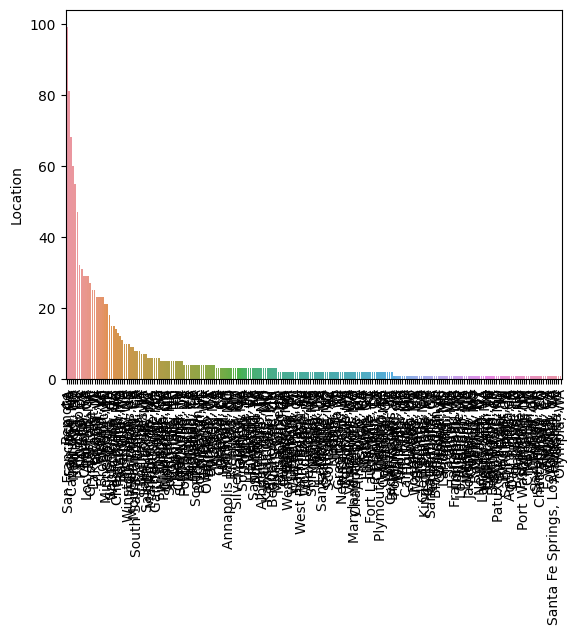

Graph for Size: total = 22


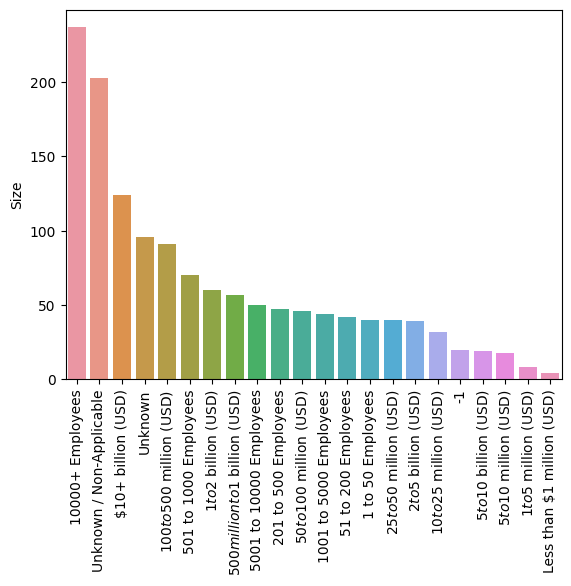

Graph for Type of ownership: total = 13


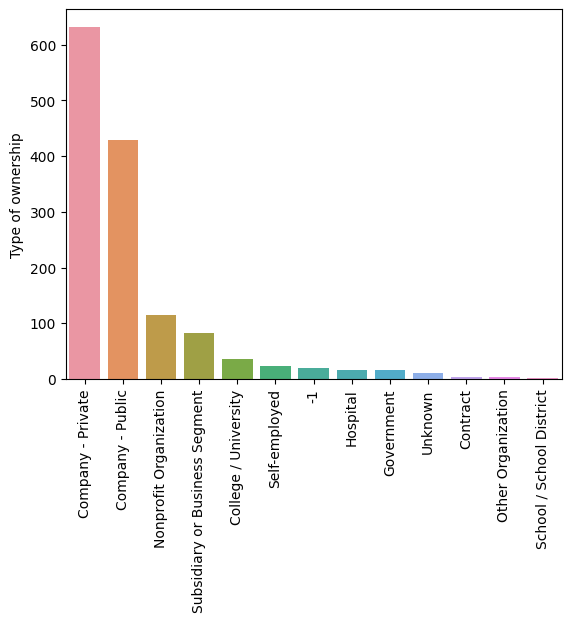

Graph for Industry: total = 83


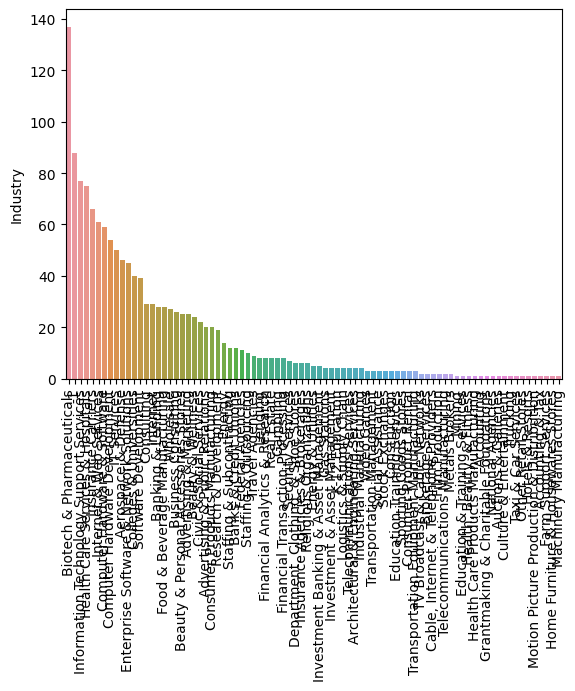

Graph for Sector: total = 37


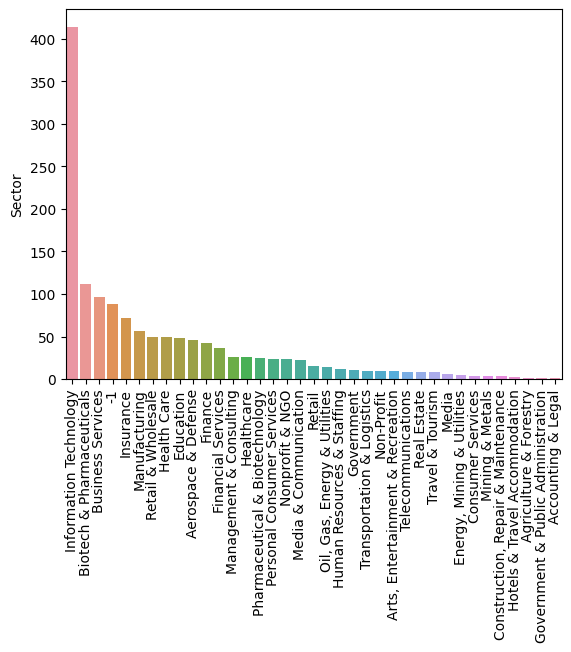

Graph for Revenue: total = 17


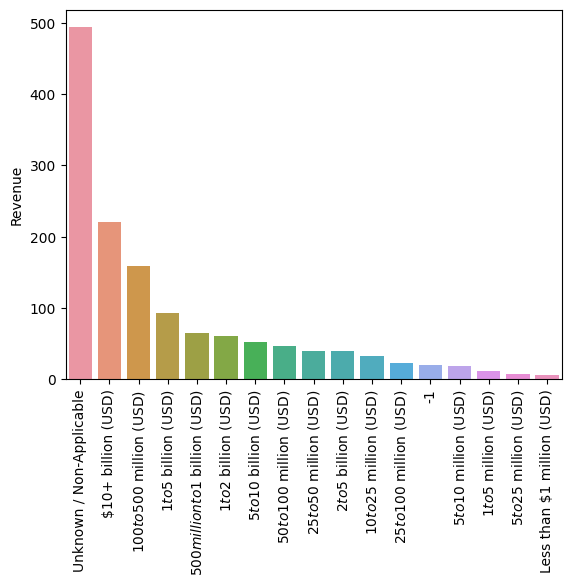

Graph for Company: total = 440


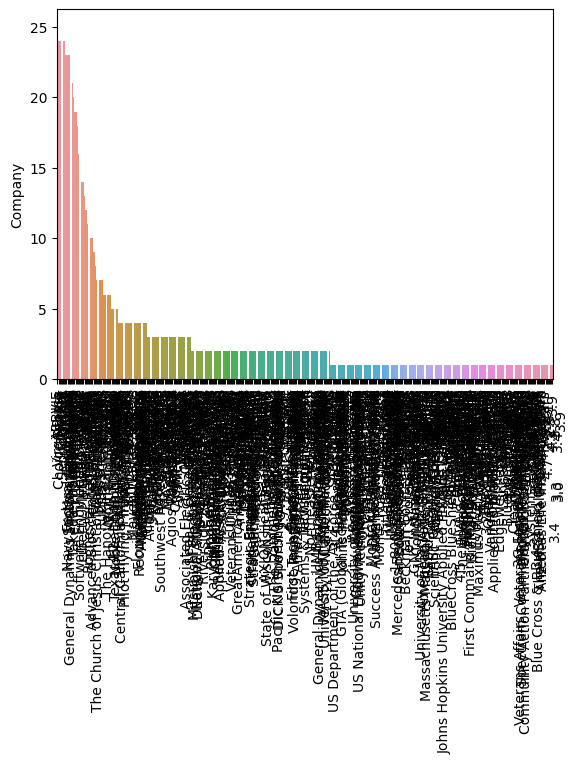

Graph for job_state: total = 42


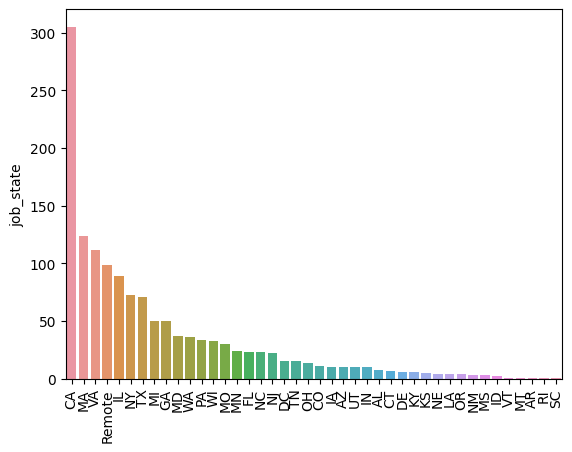

Graph for python_yn: total = 2


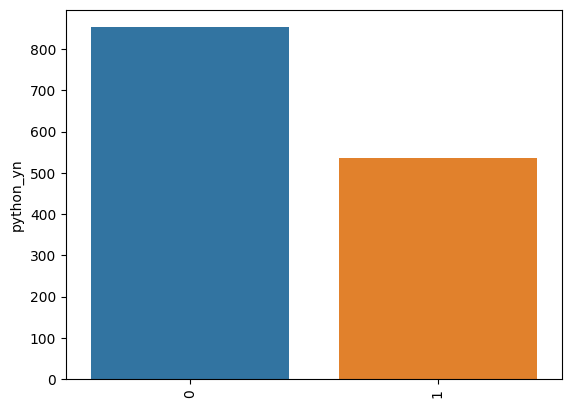

Graph for aws_yn: total = 2


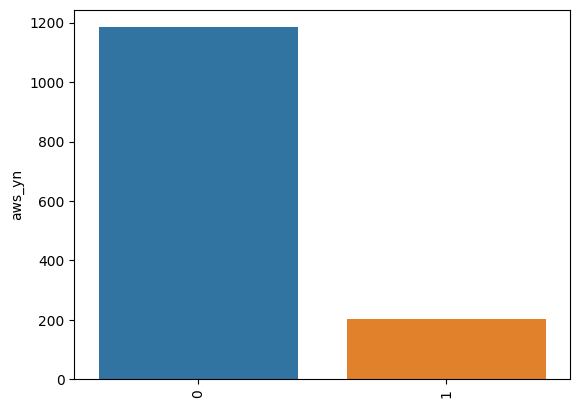

Graph for excel_yn: total = 2


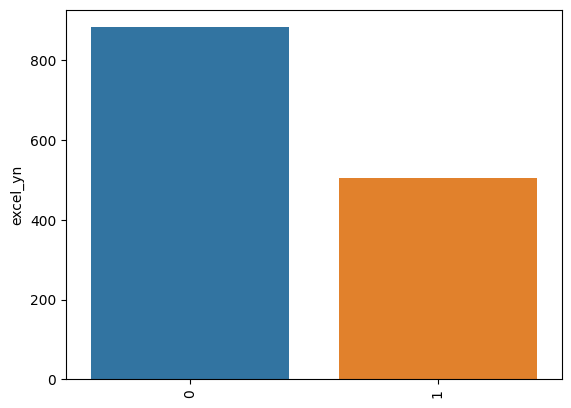

Graph for job_simp: total = 8


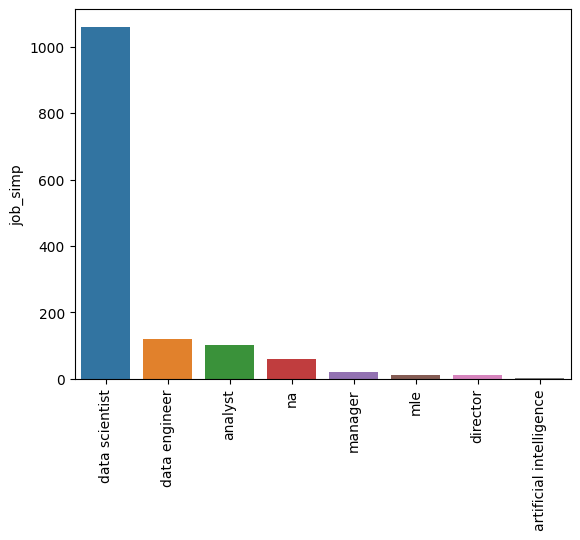

Graph for seniority: total = 4


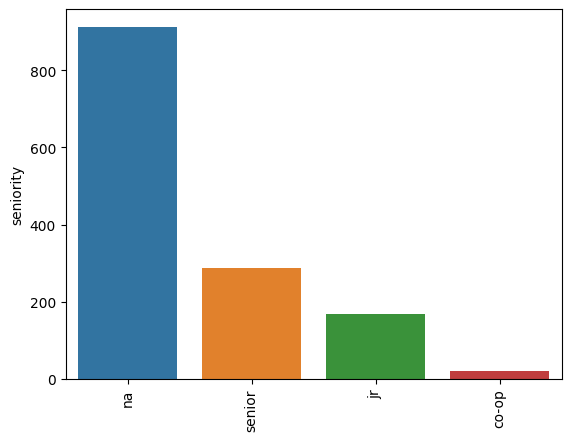

In [27]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: total = %d' % (i,len(cat_num)))
    my_plot=sns.barplot(x=cat_num.index,y=cat_num)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 212


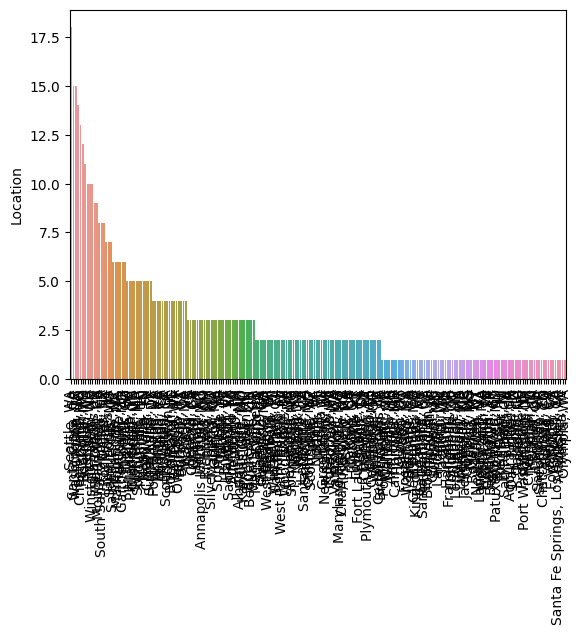

Graph for job_state: total = 22


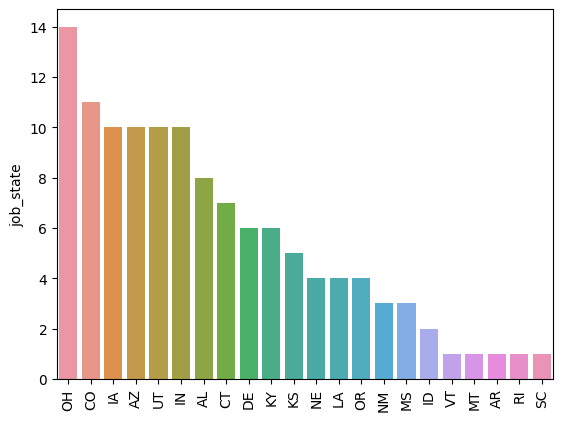

Graph for Company: total = 420


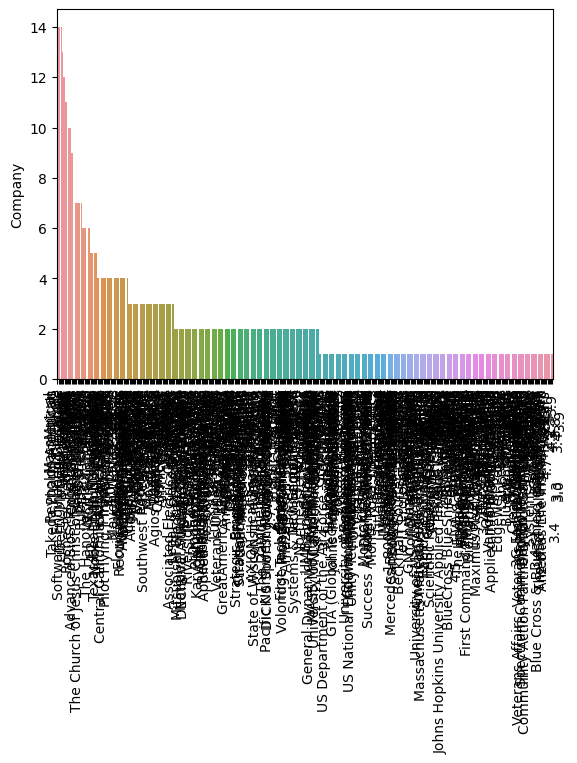

In [28]:
for i in df_cat[['Location','job_state','Company']]:
    cat_num = df_cat[i].value_counts()[20:]
    print('Graph for %s: total = %d' % (i,len(cat_num)))
    my_plot=sns.barplot(x=cat_num.index,y=cat_num)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
    plt.show()

In [29]:
df.columns

Index(['Job Name', 'Company', 'Rating', 'Location', 'Salary', 'Description',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [30]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,66.932039
artificial intelligence,83.250000
data engineer,105.403361
data scientist,108.716887
director,173.500000
manager,83.428571
mle,119.958333
na,100.118644


In [31]:
pd.pivot_table(df, index=['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp                seniority            
analyst                 jr          47.555556
                        na          65.073529
                        senior      78.500000
artificial intelligence na          83.250000
data engineer           jr         118.900000
                        na          95.259740
                        senior     124.689189
data scientist          co-op       68.000000
                        jr          89.466887
                        na         106.053247
                        senior     137.119898
director                na         173.500000
manager                 na          83.428571
mle                     na         119.958333
na                      jr          62.500000
                        na          87.724138
                        senior     115.642857

In [32]:
pd.pivot_table(df, index=['job_state','seniority'], values='avg_salary').sort_values('avg_salary',ascending = False)

,,avg_salary
job_state,seniority,
DC,senior,237.500000
CA,senior,167.695946
Remote,senior,149.500000
MD,jr,145.500000
UT,senior,140.500000
...,...,...
MS,na,52.500000
MT,na,51.000000
FL,jr,50.000000


In [33]:
pd.pivot_table(df, index='job_state', values='avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
CA,132.983607
AR,130.000000
VT,109.500000
DC,108.166667
MA,108.092742
MN,107.333333
MI,106.960000
VA,105.665179
IL,104.157303


In [34]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [35]:
pd.pivot_table(df, index=['job_state','job_simp'], values='avg_salary').sort_values('job_state',ascending = False)

avg_salary
job_state job_simp                           
WI        data scientist            62.633333
          analyst                   58.833333
WA        data scientist            98.181818
          analyst                   54.500000
VT        data scientist           109.500000
VA        na                        79.300000
          mle                       87.000000
          data scientist           110.848315
          data engineer             96.900000
          analyst                   71.583333
UT        data scientist           140.500000
          data engineer            100.333333
          analyst                   54.750000
TX        data engineer            113.062500
          data scientist            75.936508
TN        data scientist           102.000000
          data engineer            100.950000
          analyst                   27.000000
SC        data scientist            60.500000
Remote    data scientist           104.289796
          artificial intelligence   35.000000
RI        analyst                  100.000000
PA        na                       111.500000
          manager                  109.666667
          data scientist           105.000000
          data engineer             91.500000
          analyst                   62.750000
OR        data engineer             73.000000
          data scientist            98.500000
OH        data scientist           101.050000
          analyst                   53.875000
NY        na                       100.500000
          mle                      125.000000
          data scientist           107.509804
          data engineer             86.375000
          analyst                   65.607143
NM        data scientist            74.333333
NJ        analyst                   83.583333
          manager                  109.500000
          director                 161.500000
          data scientist           101.000000
          data engineer            112.000000
NE        data scientist            53.500000
NC        data scientist            99.117647
          data engineer            104.250000
MT        data scientist            51.000000
MS        data scientist            70.500000
MO        na                        70.500000
          manager                   40.500000
          data scientist            99.340000
          analyst                   61.000000
MN        data scientist           108.500000
          data engineer             95.000000
          analyst                  104.875000
MI        manager                   87.500000
          data scientist           107.770833
MD        na                        96.750000
          data scientist           100.535714
          data engineer            109.000000
          analyst                   84.750000
MA        na                        98.357143
          manager                   65.750000
          director                  85.000000
          data scientist           113.542553
          data engineer            107.291667
          analyst                   59.125000
LA        data scientist            40.000000
          data engineer             70.500000
          analyst                   48.000000
KY        data scientist            97.000000
KS        data scientist           102.500000
          mle                       87.000000
IN        na                        69.000000
          data scientist            84.500000
          data engineer            114.500000
IL        na                        66.500000
          director                 221.750000
          data scientist            97.685714
          data engineer             96.125000
          analyst                   66.500000
ID        analyst                   56.250000
IA        data engineer            102.833333
          analyst                   43.000000
          data scientist           120.000000
GA        data scientist            87.437500
          na                     

In [36]:
pd.pivot_table(df, index=['job_state','job_simp'], values='avg_salary', aggfunc='count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                           
WI        data scientist                   30
          analyst                           3
WA        data scientist                   33
          analyst                           3
VT        data scientist                    1
VA        na                                5
          mle                               2
          data scientist                   89
          data engineer                    10
          analyst                           6
UT        data scientist                    3
          data engineer                     3
          analyst                           4
TX        data engineer                     8
          data scientist                   63
TN        data scientist                    3
          data engineer                    10
          analyst                           2
SC        data scientist                    1
Remote    data scientist                   98
          artificial intelligence           1
RI        analyst                           1
PA        na                                2
          manager                           3
          data scientist                   20
          data engineer                     1
          analyst                           8
OR        data engineer                     1
          data scientist                    3
OH        data scientist                   10
          analyst                           4
NY        na                                2
          mle                               2
          data scientist                   51
          data engineer                     4
          analyst                          14
NM        data scientist                    3
NJ        analyst                           6
          manager                           2
          director                          2
          data scientist                   10
          data engineer                     2
NE        data scientist                    4
NC        data scientist                   17
          data engineer                     6
MT        data scientist                    1
MS        data scientist                    3
MO        na                                2
          manager                           1
          data scientist                   25
          analyst                           2
MN        data scientist                   19
          data engineer                     1
          analyst                           4
MI        manager                           2
          data scientist                   48
MD        na                                4
          data scientist                   28
          data engineer                     3
          analyst                           2
MA        na                                7
          manager                           4
          director                          3
          data scientist                   94
          data engineer                    12
          analyst                           4
LA        data scientist                    1
          data engineer                     2
          analyst                           1
KY        data scientist                    6
KS        data scientist                    2
          mle                               3
IN        na                                4
          data scientist                    2
          data engineer                     4
IL        na                                2
          director                          6
          data scientist                   70
          data engineer                     8
          analyst                           3
ID        analyst                           2
IA        data engineer                     3
          analyst                           2
          data scientist                    5
GA        data scientist                   32
          na                     

In [37]:
df.columns

Index(['Job Name', 'Company', 'Rating', 'Location', 'Salary', 'Description',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [38]:
df_pivots = df[['Rating', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'hourly', 'employer provided',
       'python_yn', 'aws_yn', 'excel_yn','avg_salary']]

In [39]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
 4.9    135.500000
 4.1    128.657895
 4.5    126.823529
 2.5    120.000000
 3.6    117.331579
 4.4    113.945205
 3.7    111.786765
 2.6    109.083333
 4.3    106.648936
 3.2    106.458333
 4.2    106.382353
 4.7    106.106061
 5.0    104.803030
 3.5    104.716867
 4.0    104.057471
 3.8    103.543478
-1.0    102.275862
 3.3     99.000000
 4.6     98.318182
 2.2     97.750000
 2.1     95.900000
 3.4     95.480000
 3.9     94.870323
 4.8     93.033333
 3.1     92.150000
 2.9     90.036585
 1.9     87.500000
 2.7     86.500000
 3.0     85.000000
 2.8     83.928571
 2.3     81.500000
 2.4     60.214286
Size
                                  avg_salary
Size                                        
5001 to 10000 Employees           168.610000
$5 to $10 million (USD)           126.111111
$1 to $5 million (USD)            119.312500
$10+ billion (USD)                115.568548
1 to 50 Employees                 115.375000
1001 to 5000 Employees     

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [40]:
pd.pivot_table(df_pivots, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 billion (USD),93.0,NaN
$1 to $5 million (USD),3.0,9.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),111.0,109.0
$100 to $500 million (USD),114.0,45.0
$2 to $5 billion (USD),17.0,22.0
$25 to $100 million (USD),21.0,2.0
$25 to $50 million (USD),24.0,16.0


In [49]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aman_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aman_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

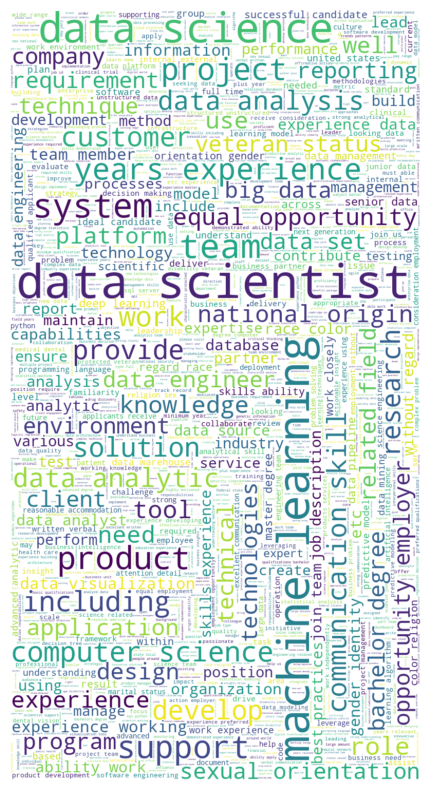

In [50]:
words = " ".join(df['Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()